# Optimización

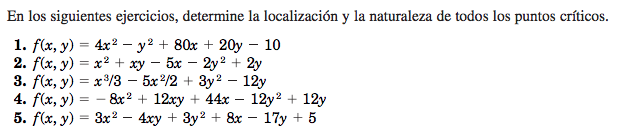

In [1]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing ()

In [23]:
var("x y")

In [24]:
#Problema 1
f=4*x**2-y**2+80*x+20*y-10
f

In [25]:
nablaf=[f.diff(var) for var in [x,y]]
nablaf

In [26]:
#puntos criticos
pcs=solve(nablaf)
pcs

In [27]:
#Problema 2
f=x**2+x*y-5*x-2*y**2+2*y
f

In [28]:
nablaf=[f.diff(var) for var in [x,y]]
nablaf

In [29]:
pcs=solve(nablaf)
pcs

In [30]:
#problema 3
f=(x**3/3)-(5*x**2)/(2)+3*y**2-12*y
f

In [31]:
nablaf=[f.diff(var) for var in [x,y]]
nablaf

In [32]:
pcs=solve(nablaf)
pcs

In [33]:
#problema 4
f=-8*x**2+12*x*y+44*x-12*y**2+12*y
f

In [34]:
pcs=solve(nablaf)
pcs

In [35]:
#Problema 5
f=3*x**2-4*x*y+3*y**2+8*x-17*y+5
f

In [16]:
nablaf=[f.diff(var) for var in [x,y]]
nablaf

In [17]:
pcs=solve(nablaf)
pcs

6. Una compañía fabrica y venden dos modelos de lámpara L1 y L2. Para su fabricación se necesita un trabajo manual de 20 minutos para el modelo L1 y de 30 minutos para el L2; y un trabajo de máquina para L1 y de 10 minutos para L2. Se dispone para el trabajo manual de 100 horas al mes y para la máquina 80 horas al mes. Sabiendo que el beneficio por unidad es de 15 y 10 euros para L1 y L2, respectivamente, planificar la producción para obtener el máximo beneficio.

In [36]:
!pip install pulp

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
from pulp import *

In [42]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMaximize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=15*x+10*y

#Constraints
mi_lp_problema+=1/3*x+1/2*y<=100
mi_lp_problema+=1/3*x+1/6*y<=80

In [43]:
mi_lp_problema

Mi LP problema:
MAXIMIZE
15*x + 10*y + 0
SUBJECT TO
_C1: 0.333333333333 x + 0.5 y <= 100

_C2: 0.333333333333 x + 0.166666666667 y <= 80

VARIABLES
x Continuous
y Continuous

In [44]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [45]:
for variable in mi_lp_problema.variables():
    print ("{}={}".format(variable.name, variable.varValue))

x=210.0
y=60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [46]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMaximize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=6.5*x+7*y

#Constraints
mi_lp_problema+=2*x+3*y<=600
mi_lp_problema+=x+y<=500
mi_lp_problema+=2*x+y<=400
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MAXIMIZE
6.5*x + 7*y + 0.0
SUBJECT TO
_C1: 2 x + 3 y <= 600

_C2: x + y <= 500

_C3: 2 x + y <= 400

_C4: x >= 0

_C5: y >= 0

VARIABLES
x Continuous
y Continuous

In [47]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [48]:
for variable in mi_lp_problema.variables():
    print ("{}={}".format(variable.name, variable.varValue))

x=150.0
y=100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [50]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMinimize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=10*x+30*y

#Constraints
mi_lp_problema+=x+5*y>=15
mi_lp_problema+=5*x+y>=15
mi_lp_problema+=x>=0
mi_lp_problema+=y>=0
mi_lp_problema

Mi LP problema:
MINIMIZE
10*x + 30*y + 0
SUBJECT TO
_C1: x + 5 y >= 15

_C2: 5 x + y >= 15

_C3: x >= 0

_C4: y >= 0

VARIABLES
x Continuous
y Continuous

In [51]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [52]:
for variable in mi_lp_problema.variables():
    print ("{}={}".format(variable.name, variable.varValue))

x=2.5
y=2.5


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [53]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMaximize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=2*x+y
#x=pastillas grandes, y=pastillas chicas

#Constraints
mi_lp_problema+=40*x+30*y<=600
mi_lp_problema+=x>=3
mi_lp_problema+=y>=2*x
mi_lp_problema+=y>=0
mi_lp_problema+=x>=0
mi_lp_problema

Mi LP problema:
MAXIMIZE
2*x + 1*y + 0
SUBJECT TO
_C1: 40 x + 30 y <= 600

_C2: x >= 3

_C3: - 2 x + y >= 0

_C4: y >= 0

_C5: x >= 0

VARIABLES
x Continuous
y Continuous

In [54]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [55]:
for variable in mi_lp_problema.variables():
    print ("{}={}".format(variable.name, variable.varValue))

x=6.0
y=12.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [66]:
mi_lp_problema=pulp.LpProblem("Mi LP problema",pulp.LpMinimize)
x=pulp.LpVariable('x',lowBound=0,cat='Continuous')
y=pulp.LpVariable('y',lowBound=0,cat='Continuous')

#Objective function
mi_lp_problema+=600*x+800*y
#x=autobus pequeño, y=Autobus grande

#Constraints
mi_lp_problema+=40*x+50*y>=400
mi_lp_problema+=x+y<=9
mi_lp_problema+=y>=0
mi_lp_problema+=x>=0
mi_lp_problema

Mi LP problema:
MINIMIZE
600*x + 800*y + 0
SUBJECT TO
_C1: 40 x + 50 y >= 400

_C2: x + y <= 9

_C3: y >= 0

_C4: x >= 0

VARIABLES
x Continuous
y Continuous

In [67]:
mi_lp_problema.solve()
pulp.LpStatus[mi_lp_problema.status]

'Optimal'

In [68]:
for variable in mi_lp_problema.variables():
    print ("{}={}".format(variable.name, variable.varValue))

x=5.0
y=4.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [99]:
import numpy as np 
np.random.seed 
altura=np.random.normal(171,10,30) #para generar la altura
peso=altura-100+np.random.normal(0,10,30) #generas peso


In [100]:
from scipy.stats import linregress

In [101]:
ctes=linregress(altura, peso)
linregress(altura,peso)

In [102]:
punto_x=float(input("Ingrese altura para predecir peso"))
punto_y=ctes.intercept+ctes.slope*punto_x
print("La coordenada del punto buscado es altura=", punto_x, "peso=", punto_y)

Ingrese altura para predecir peso195
La coordenada del punto buscado es altura= 195.0 peso= 96.83826966182322


<IPython.core.display.Javascript object>


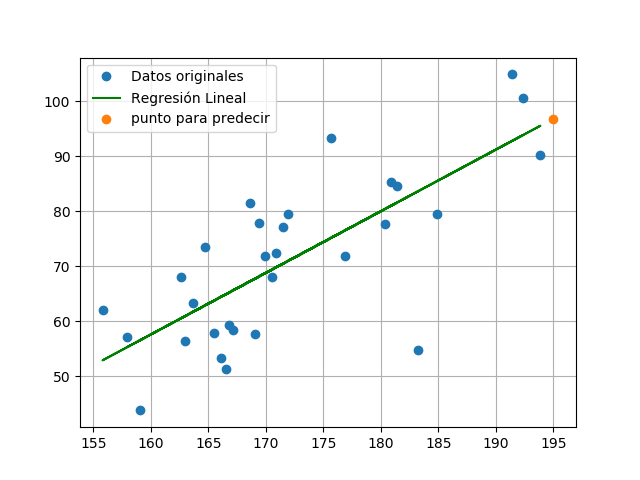

In [103]:
a=plt.plot(altura, peso, 'o', label='Datos originales')
a=plt.plot(altura, ctes.intercept+ctes.slope*altura, 'g', label='Regresión Lineal')
a=plt.plot(punto_x,punto_y,"o",label="punto para predecir")
a=plt.legend()
a=plt.grid()
plt.show()

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [78]:
!open .

In [79]:
import os
import pandas as pd

UCI = pd.read_csv('UCI.csv')
print(UCI.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


In [80]:
UCI.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [89]:
labels=UCI.y.values
features = UCI[['age', 'job', 'marital', 'education', 
                'month', 'day_of_week', 'duration', 'campaign']]


In [90]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
features.head()

,age,job,marital,education,month,day_of_week,duration,campaign
0,44,blue-collar,married,basic.4y,aug,thu,210,1
1,53,technician,married,unknown,nov,fri,138,1
2,28,management,single,university.degree,jun,thu,339,3
3,39,services,married,high.school,apr,fri,185,2
4,55,retired,married,basic.4y,aug,fri,137,1


In [92]:
pd.get_dummies(features).head()

,age,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,44,210,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,53,138,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,28,339,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,39,185,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,55,137,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
features_dummies =pd.get_dummies(features,
                                columns=['age', 'job', 'marital', 'education', 
                'month', 'day_of_week', 'duration', 'campaign']


SyntaxError: unexpected EOF while parsing (<ipython-input-105-ae05ea86e376>, line 3)

### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)